# Bibliotecas

In [2]:
#### Libs necessárias ####
import pandas as pd
import numpy as np

#### Libs gráficas ####
import matplotlib.pyplot as plt
import seaborn as sns

#### Remoção de Avisos ####
import warnings
warnings.filterwarnings('ignore')

#### Confirações gerais no pandas ####
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

#### Configurações gerais no Matplotlib ####
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# Exploração dos dados

### **Pergunta norteadora: "Quanto vale o aluguel da sua casa?"**

## Lendo dados

In [3]:
nome_arquivo = 'house_data.csv'
df_dados = pd.read_csv(nome_arquivo)

## Primeiras informações

In [4]:
print('Quantidade de colunas:', df_dados.shape[0])
print('Quantidade de linhas:', df_dados.shape[1])

#### Primeiros 5 registros para visualização ####
df_dados.head()


Quantidade de colunas: 10692
Quantidade de linhas: 13


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Limpeza dos dados

In [5]:
#### Removeremos as colunas 'fire insurance' pois tal informação seria variavel dependendo da corretora e 'total' pois é o que queremos determinar. 

In [6]:
df_dados.drop(columns=['fire insurance (R$)','total (R$)'], inplace=True)
df_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [7]:
#### Checando para determinar se há algum valor nulo ####
#### Utilizando o sort_values com ascending = False para ordenar os valores pela quantidade caso houvessem valores nulos ####
df_dados.isnull().sum().sort_values(ascending=False).reset_index()

,index,0
0,city,0
1,area,0
2,rooms,0
3,bathroom,0
4,parking spaces,0
5,floor,0
6,animal,0
7,furniture,0
8,hoa (R$),0
9,rent amount (R$),0


In [8]:
#### Quantidade de valores únicos ####
df_dados.nunique().reset_index()

,index,0
0,city,5
1,area,517
2,rooms,11
3,bathroom,10
4,parking spaces,11
5,floor,35
6,animal,2
7,furniture,2
8,hoa (R$),1679
9,rent amount (R$),1195


In [9]:
#### Informações das colunas ####
#### Para informações mais completas podemos utilizar a função info()
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [10]:
#### Para determinar apenas os tipos dos dados das colunas podemos utilizar dtypes ####
df_dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

# Exploração Analítica (EDA)

In [11]:
#### Separando pelos tipos de colunas ####
colunas_categoricas = df_dados.columns[df_dados.dtypes == object]
colunas_numericas = df_dados.columns[df_dados.dtypes != object]

In [12]:
df_dados_categoricos = df_dados[colunas_categoricas]
df_dados_categoricos.head()

,city,floor,animal,furniture
0,São Paulo,7,acept,furnished
1,São Paulo,20,acept,not furnished
2,Porto Alegre,6,acept,not furnished
3,Porto Alegre,2,acept,not furnished
4,São Paulo,1,not acept,not furnished


In [13]:
df_dados_numericos = df_dados[colunas_numericas]
df_dados_numericos.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$)
0,70,2,1,1,2065,3300,211
1,320,4,4,0,1200,4960,1750
2,80,1,1,1,1000,2800,0
3,51,2,1,0,270,1112,22
4,25,1,1,0,0,800,25


## Análise dos campos categóricos

In [14]:
#### Podemos realizar o procedimento abaixo em um loop para cada coluna porém ####
#### optei por realizar cada de forma separada para que a visualização fosse mais clara ####

In [15]:
df_dados_categoricos.head()

,city,floor,animal,furniture
0,São Paulo,7,acept,furnished
1,São Paulo,20,acept,not furnished
2,Porto Alegre,6,acept,not furnished
3,Porto Alegre,2,acept,not furnished
4,São Paulo,1,not acept,not furnished


### Distribuição por cidades

In [16]:
(df_dados_categoricos['city'].value_counts(normalize=True) * 100).reset_index()

,index,city
0,São Paulo,55.059858
1,Rio de Janeiro,14.038533
2,Belo Horizonte,11.765806
3,Porto Alegre,11.157875
4,Campinas,7.977927


### Distribuição dos andares

In [17]:
(df_dados_categoricos['floor'].value_counts(normalize=True) * 100).reset_index()

,index,floor
0,-,23.017209
1,1,10.110363
2,2,9.212495
3,3,8.707445
4,4,6.995885
5,5,5.611672
6,6,5.041152
7,7,4.648335
8,8,4.582866
9,9,3.451178


In [18]:
#### Note que temos uma das opções no andar 301 porém realizando uma breve pesquisa podemos checar que o prédio mais alto do mundo possui 163 andares, ####
#### portanto, iremos realizar a correção do dado para andar 30 supondo que tal foi um erro de digitação. ####
#### Poderíamos optar por remover o mesmo como uma opção porém neste momento não quero remover dados da nossa base. ####

In [19]:
#### Corrigindo o valor do andar ####
df_dados_categoricos.loc[df_dados_categoricos['floor'] == '301', 'floor'] = 30

In [20]:
#### Checando a correção ####
df_dados_categoricos.loc[df_dados_categoricos['floor'] == '301']

,city,floor,animal,furniture


In [21]:
#### Note também que temos um dos andares com o valor '-', neste caso iremos trocar para que seja andar '0' ####
df_dados_categoricos.loc[df_dados_categoricos['floor'] == '-', 'floor'] = 0

In [22]:
#### Checando a correção ####
df_dados_categoricos.loc[df_dados_categoricos['floor'] == '-']

,city,floor,animal,furniture


In [23]:
#### Visualizando a base com as alterações realizadas ####
(df_dados_categoricos['floor'].value_counts(normalize=True) * 100).reset_index()

,index,floor
0,0,23.017209
1,1,10.110363
2,2,9.212495
3,3,8.707445
4,4,6.995885
5,5,5.611672
6,6,5.041152
7,7,4.648335
8,8,4.582866
9,9,3.451178


In [24]:
#### Podemos agora transformar o andar em uma informação do tipo numérica ####
df_dados_categoricos['floor'] = pd.to_numeric(df_dados_categoricos['floor'])

In [25]:
#### Movendo coluna para o df correspondente aos dados numéricos
df_dados_numericos['floor'] = df_dados_categoricos['floor']
df_dados_categoricos.drop(columns='floor',inplace=True)

In [26]:
#### Checando
print(df_dados_categoricos.columns)
print(df_dados_numericos.columns)

Index(['city', 'animal', 'furniture'], dtype='object')
Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)', 'floor'],
      dtype='object')


### Distribuição de aceitação de animais

In [27]:
(df_dados_categoricos['animal'].value_counts(normalize=True) * 100).reset_index()

,index,animal
0,acept,77.777778
1,not acept,22.222222


### Distribuição por locais mobiliados ou não

In [28]:
(df_dados_categoricos['furniture'].value_counts(normalize=True) * 100).reset_index()

,index,furniture
0,not furnished,75.626637
1,furnished,24.373363


## Análise dos campos numéricos

### Grid de Gráficos 

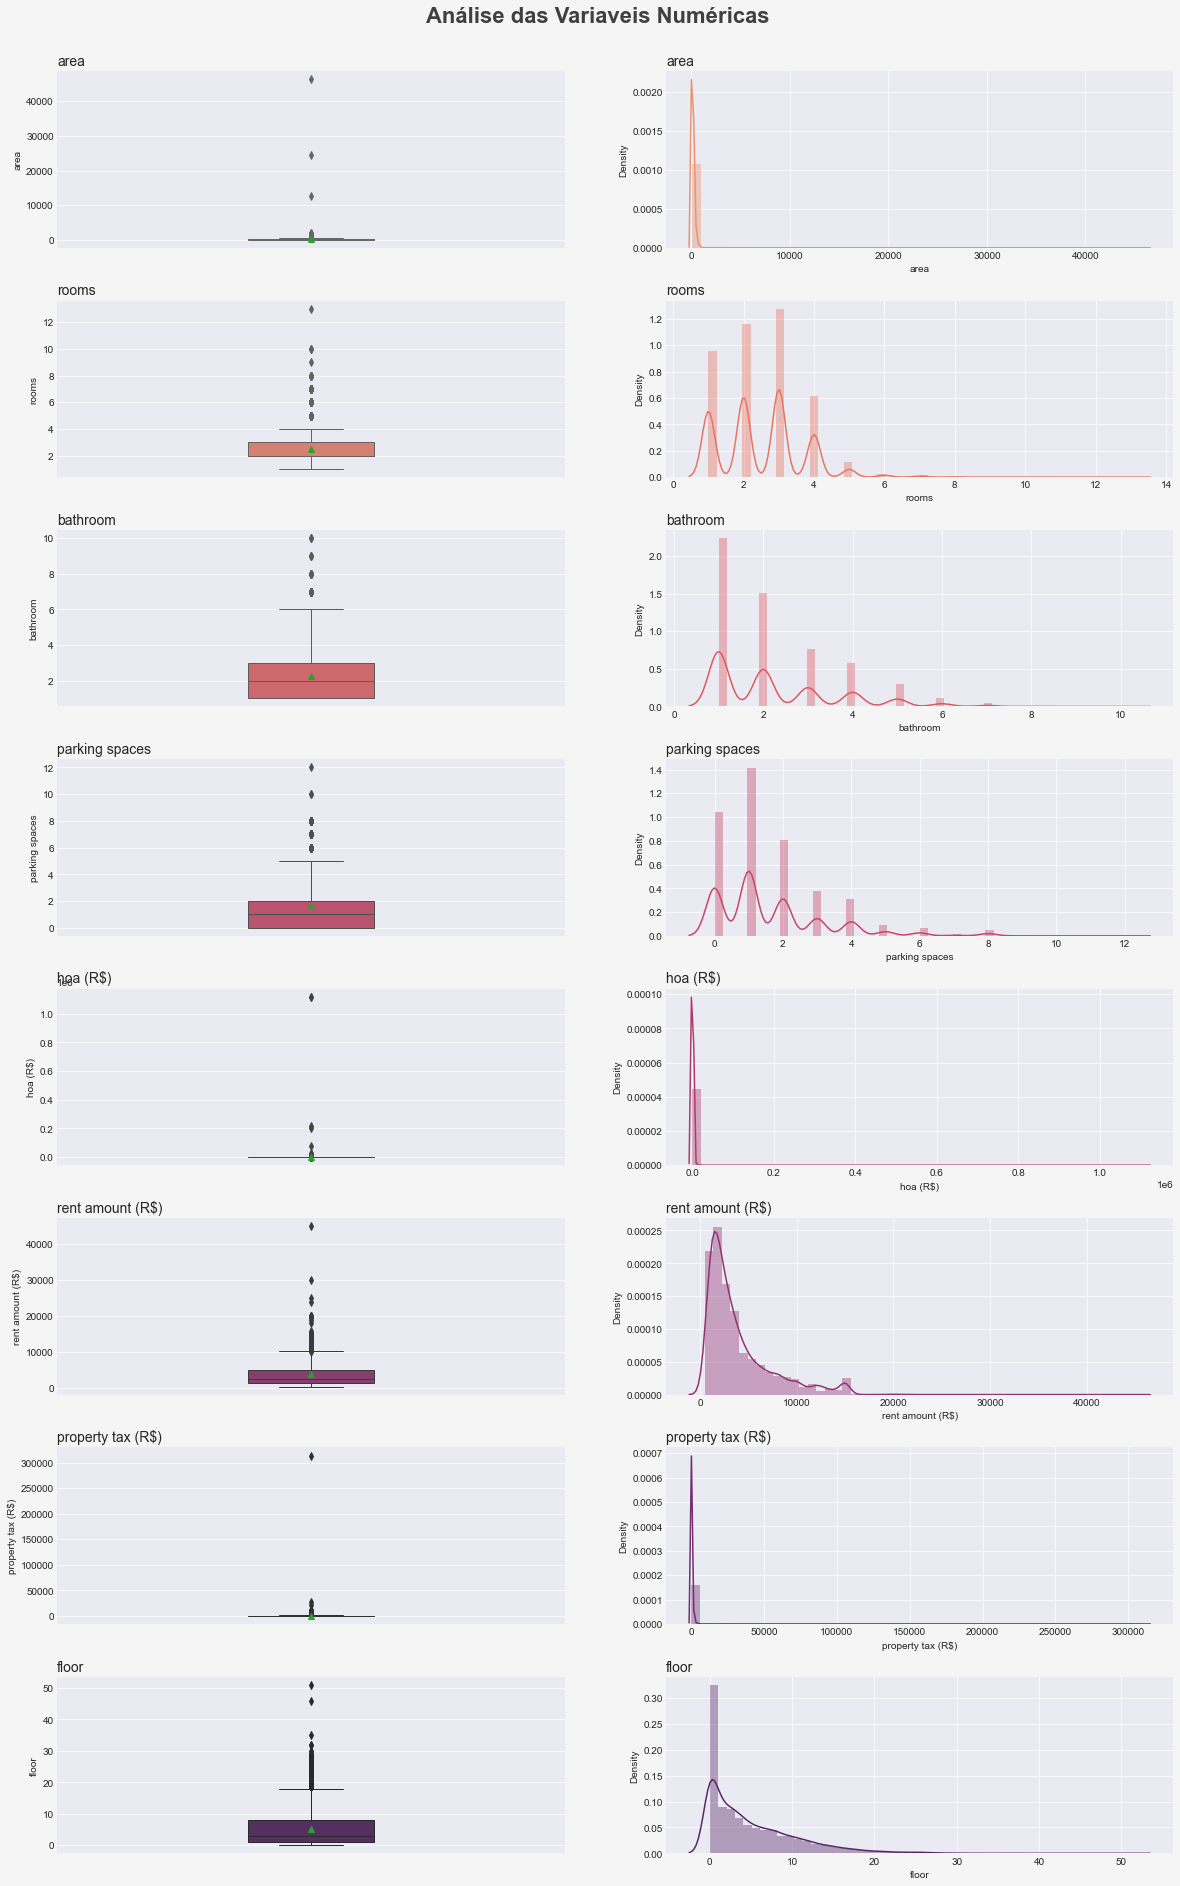

In [29]:
#### Tamanho do Grid ####
fig, eixo = plt.subplots( figsize=(20, 30) )

#### Cor de fundo ####
cor_fundo = '#f5f5f5'
fig.set_facecolor( cor_fundo )

#### Paleta de Cores ####
qtd_colunas_numericadas = df_dados_numericos.shape[1]
paleta_cores = sns.color_palette( 'flare', qtd_colunas_numericadas * 2 )

#### Titulo ####
plt.suptitle('Análise das Variaveis Numéricas', fontsize=22, color='#404040', fontweight=600 )


#### Estrutura ####
#### (Todas as infos numericas) ####
linhas = 8

####( Boxplot - Distplot) #### 
colunas = 2 

#### Posicao inicial do grid ####
posicao = 1 

#### Loop para plotar os gráficos ####
for coluna in df_dados_numericos.columns:

  #### Plot no Grid -- Boxplot ####
  plt.subplot( linhas, colunas, posicao )

  #### Titulo ####
  plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200 )

  #### Plot ####
  sns.boxplot( data=df_dados_numericos, y=coluna, showmeans=True, saturation=0.75, 
              linewidth=1, color=paleta_cores[posicao], width=0.25 )

  #### Próximo item da iteração ####
  posicao += 1

  #### Plot no Grid -- Distplot ####
  plt.subplot( linhas, colunas, posicao )

  #### Titulo ####
  plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200 )

  #### Plot ####
  sns.distplot( df_dados_numericos[coluna], color=paleta_cores[ posicao - 1 ] )

  #### Próximo item da iteração ####
  posicao += 1

# Ajute de Grid
plt.subplots_adjust( top=0.95, hspace=0.3 )

# Feature engineering

In [30]:
df_dados['floor'] = df_dados_numericos['floor']

In [31]:
#### Ajustando colunas ####
df_dados['animal'] = df_dados['animal'].map( {'acept':1, 'not acept':0})
df_dados['furniture'] = df_dados['furniture'].map( {'furnished':1, 'not furnished':0})

#### Filtrar a Cidade de São Paulo para ser nosso MVP ####
df_sp = df_dados.loc[ df_dados['city'] == 'São Paulo']
df_sp.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [32]:
# Removendo a Coluna Cidade
df_sp.drop( columns=['city'], inplace=True)

In [33]:
# Separando dados
df_caracteristicas = df_sp.drop( columns=['rent amount (R$)'] )
df_previsor = df_sp[['rent amount (R$)']]

In [34]:
df_caracteristicas.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [35]:
df_previsor.head()

,rent amount (R$)
0,3300
1,4960
4,800
5,8000
7,3223


## Correlação

In [36]:
# Correlação
df_sp.corr()

# Proxima de 1 - Correlação Possitva [ Ambas sobem ou descem]
# Proxima de -1 - Correlação Negativa [ Uma sobe e a outra desce ou o inverso ]

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


## Correlação utilizando Yellowbrick

In [37]:
!pip install yellowbrick

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


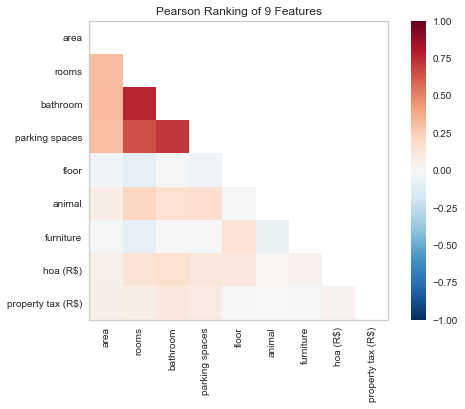

In [38]:
from yellowbrick.features import Rank2D

# Método
Correlacao = Rank2D( algoritmo='pearson')
Correlacao.fit(df_caracteristicas, df_previsor)
Correlacao.transform(df_caracteristicas)
Correlacao.show();

In [39]:
#### Separando os dados para Treino/Teste ####
from sklearn.model_selection import train_test_split

#### Divisão dos dados ####
x_treino, x_teste, y_treino, y_teste = train_test_split(df_caracteristicas, df_previsor, test_size=0.2, random_state=10)

print(f'Dados de Treino: { x_treino.shape[0] }')
print(f'Dados de Teste: { x_teste.shape[0] }')

Dados de Treino: 4709
Dados de Teste: 1178


In [40]:
#### Features mais relevantes ####
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

#### Selecao de features ####
def seleciona_features( x_treino, y_treino ):

  #### Configurar para selecionar as features
  selecao = SelectKBest( score_func=mutual_info_regression, k=5 )

  # Fitar o aprendizado
  selecao.fit( x_treino, y_treino )

  return selecao

#### Aplicar essa função ####
scores = seleciona_features( x_treino, y_treino )

#### Analisar ####
for posicao, score in enumerate( scores.scores_ ):
  print( f' { x_treino.columns[posicao] } : {score}' )

 area : 0.5134033711087023
 rooms : 0.2589646985269165
 bathroom : 0.32798160871599924
 parking spaces : 0.2845918607695088
 floor : 0.08876112566166272
 animal : 0.031199514748928348
 furniture : 0.04044140041325539
 hoa (R$) : 0.386446723242861
 property tax (R$) : 0.41245355670286443


In [41]:
#### Como não existe nenhuma variável zerada iremos utilizar todas para treinar o modelo ####

# Construção do modelo

In [42]:
#### Modelo Random Forest Regresson ####
from sklearn.ensemble import RandomForestRegressor

#### Instanciar ####
modelo_floresta = RandomForestRegressor(max_depth=5)
modelo_floresta.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5)

In [43]:
#### Avaliando a performance ####
df_previsoes = modelo_floresta.predict( x_teste )

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print(f'RMSE: {sqrt(mean_squared_error(y_teste, df_previsoes))}')
print(f'Score: {r2_score(y_teste, df_previsoes)}')

RMSE: 2455.459533681728
Score: 0.5636276336084458


In [ ]:
#### Avaliando Yellowbrick ####
from yellowbrick.regressor import PredictionError

#### Instanciar ####
modelo = RandomForestRegressor(max_depth=5)
erro_modelo = PredictionError(modelo)

erro_modelo.fit( x_treino, y_treino )
erro_modelo.score( x_teste, y_teste )
erro_modelo.show();

# Exportação

In [45]:
import joblib

joblib.dump( modelo_floresta, 'Modelo_Floresta_Aleatorio_v100.pkl')

['Modelo_Floresta_Aleatorio_v100.pkl']

In [46]:
# Testando o modelo treinado
funcao_modelo_carregado = joblib.load('Modelo_Floresta_Aleatorio_v100.pkl')

funcao_modelo_carregado.predict(x_teste.head(1).values)

array([1526.60310851])

In [47]:
x_teste.head(5).values

array([[  25,    1,    1,    0,    0,    0,    0,    0,   84],
       [ 480,    4,    5,    3,    0,    1,    0,    0,  742],
       [ 226,    3,    4,    3,    6,    1,    0, 2200, 1209],
       [ 100,    2,    4,    2,   12,    0,    1,  885,  330],
       [  35,    1,    1,    1,   14,    0,    0, 1700,  275]],
      dtype=int64)